In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from quantities import ms, s, Hz
from elephant.spike_train_generation import homogeneous_poisson_process, homogeneous_gamma_process

from scipy.optimize import curve_fit
from statsmodels.tsa.stattools import acf
from timescales.acf import exp_decay_func

In [2]:
n_neurons = 20
n_samples = 20000
spikes = np.zeros((n_neurons, n_samples), dtype='bool')
times = np.arange(0, n_samples)

for ind in range(n_neurons):
    _spikes = homogeneous_poisson_process(rate=10*Hz, t_start=0.*ms, t_stop=n_samples*ms, as_array=True)
    spikes[ind][_spikes.round().astype(int)] = 1

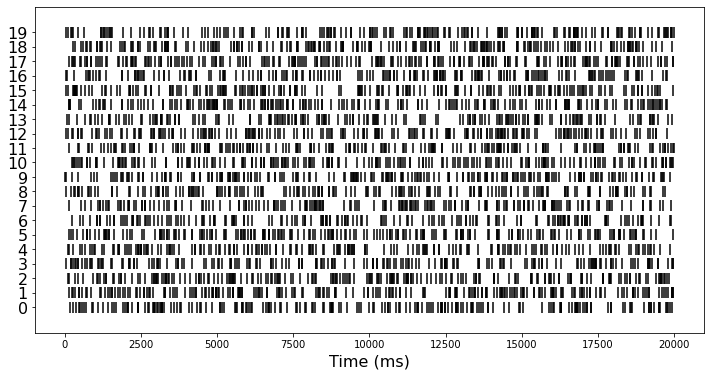

In [3]:
plt.figure(figsize=(12, 6))
plt.eventplot([times[s] for s in spikes], linelengths=0.75, color='black')
plt.xlabel('Time (ms)', fontsize=16)
plt.yticks(np.arange(n_neurons), fontsize=16);

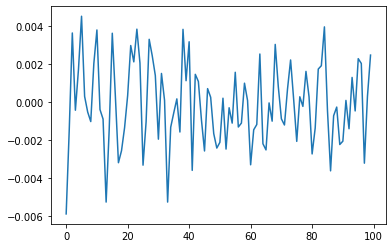

In [5]:
# Autocorr depends on convolution of spikes with a kernel

n_neurons = 20
n_samples = 200000
spikes = np.zeros((n_neurons, n_samples), dtype='bool')
times = np.arange(0, n_samples)

for ind in range(n_neurons):
    _spikes = homogeneous_poisson_process(rate=10*Hz, t_start=0.*ms, t_stop=n_samples*ms, as_array=True)
    spikes[ind][_spikes.round().astype(int)] = 1
    
corrs = acf(spikes.sum(axis=0), nlags=100, qstat=False, fft=True)[1:]

plt.plot(corrs)

In [6]:
# Fit acf
guess = [np.max(corrs), 1, 0.]  

bounds = [
    (0, 0, -2),
    (2*np.max(corrs), 200, 2)
]

params, _ = curve_fit(exp_decay_func, np.arange(0, len(corrs)), corrs,
                      p0=guess, bounds=bounds, maxfev=1000)

taus_hat = params[1]

taus_hat

33.554339556549365